# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(258, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               258 non-null    int64  
 1   Glucose                   258 non-null    int64  
 2   BloodPressure             258 non-null    int64  
 3   SkinThickness             258 non-null    int64  
 4   Insulin                   258 non-null    int64  
 5   BMI                       258 non-null    float64
 6   DiabetesPedigreeFunction  258 non-null    float64
 7   Age                       258 non-null    int64  
 8   Outcome                   258 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 18.3 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,4.127907,120.585271,69.689922,20.244186,79.248062,32.191473,0.474814,32.972868,0.379845
std,3.367722,32.895580,18.443013,15.836423,129.140169,8.564564,0.342087,11.171254,0.486291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.700000,0.248250,24.000000,0.000000
50%,4.000000,114.000000,72.000000,23.000000,0.000000,32.000000,0.377500,30.000000,0.000000
75%,7.000000,142.750000,80.000000,32.000000,119.750000,36.850000,0.634500,40.000000,1.000000
max,17.000000,197.000000,122.000000,60.000000,846.000000,67.100000,2.329000,69.000000,1.000000


# Putting Feature Variable to X and Target variable to y.


In [8]:
# Putting feature variable to X
X = df.drop('Outcome',axis=1)
# Putting response variable to y
y = df['Outcome']

# Train-Test-Split is performed


In [9]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((180, 8), (78, 8))

# Let’s import RandomForestClassifier and fit the data.


In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
#%%time
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [11]:
# checking the oob score
classifier_rf.oob_score_

0.7055555555555556

## Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.



In [12]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_score_

0.7722222222222224

In [14]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

## Now, let’s visualize

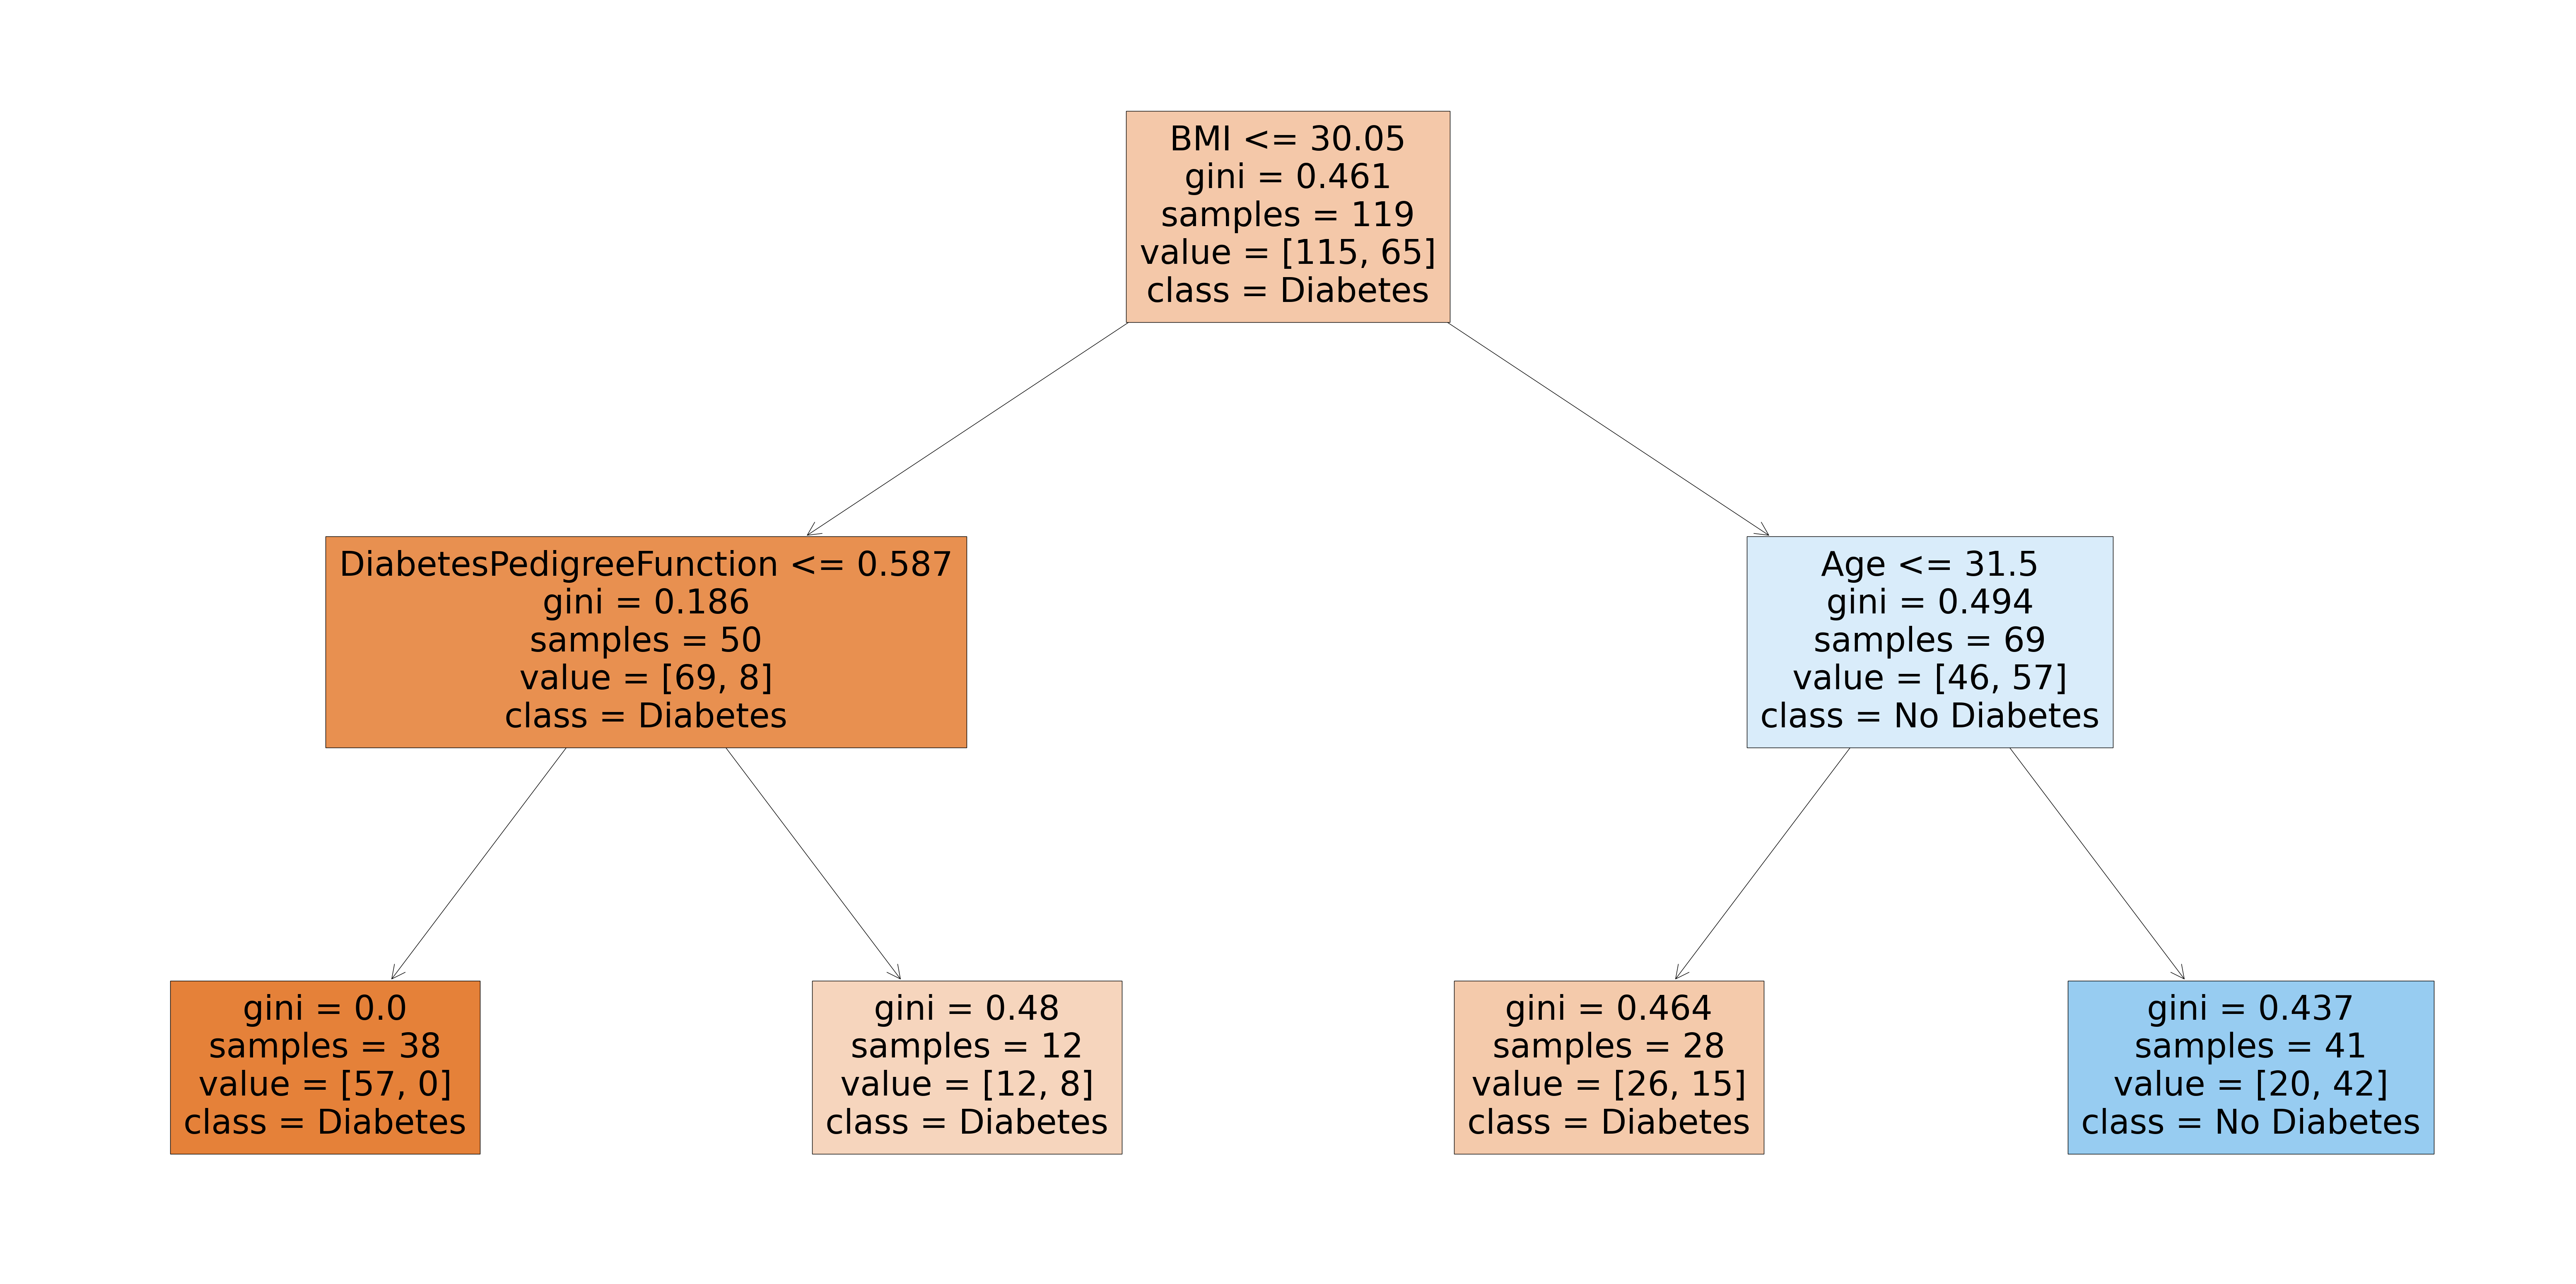

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[3], feature_names = X.columns.tolist(), class_names=['Diabetes', "No Diabetes"], filled=True);



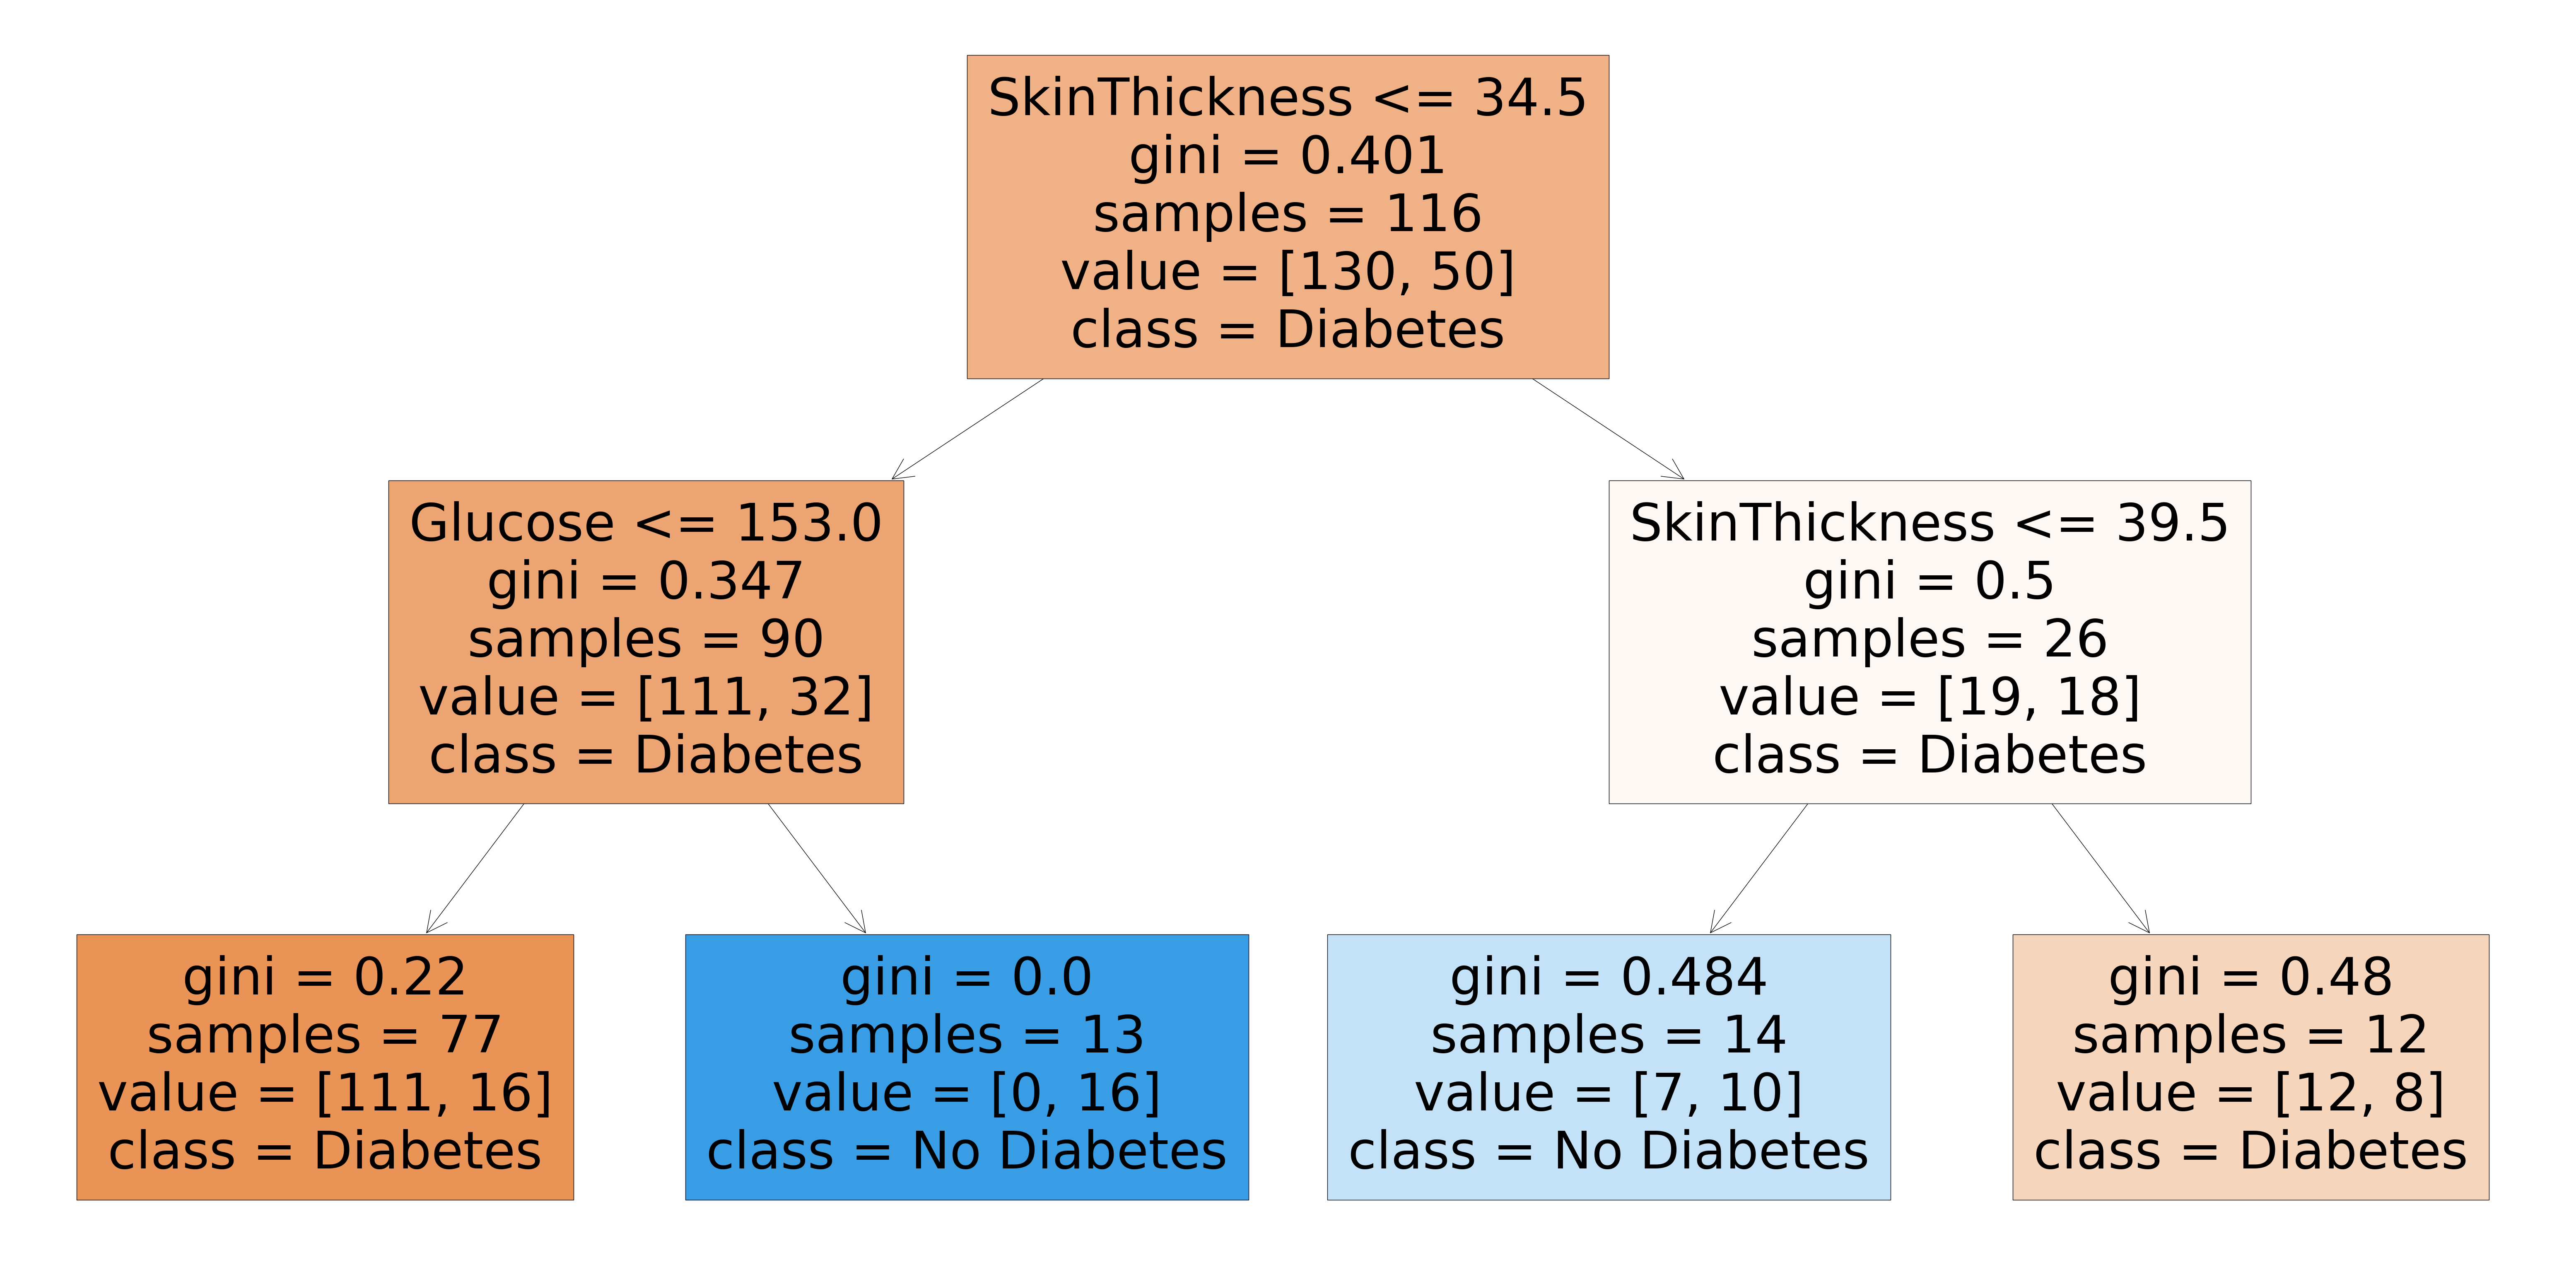

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns.tolist(), class_names=['Diabetes', "No Diabetes"], filled=True);



### Now let’s sort the data with the help of feature importance

In [17]:
rf_best.feature_importances_


array([0.08568976, 0.38676291, 0.02156627, 0.02709327, 0.07633427,
       0.20156181, 0.09400373, 0.10698798])

In [18]:
## feature importance

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [19]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
1,Glucose,0.386763
5,BMI,0.201562
7,Age,0.106988
6,DiabetesPedigreeFunction,0.094004
0,Pregnancies,0.085690
4,Insulin,0.076334
3,SkinThickness,0.027093
2,BloodPressure,0.021566


### 1. Give the Best Estimator using GridSearch CV

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Get the best estimator
rf_best = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


### 2. For the Best Estimator model we created in lab session write the following results


oob_score of Classifier = 0.7055555555555556

Accuracy score of Best Model = 0.7722222222222224

Features of Best Estimator=[0.08568976, 0.38676291, 0.02156627, 0.02709327, 0.07633427,
       0.20156181, 0.09400373, 0.10698798]
       
Feature Importance :-

        Glucose = 0.386763
        BMI = 0.201562
        Age = 0.106988
        DiabetesPedigreeFunction = 0.094004
        Pregnancies = 0.085690
        Insulin = 0.076334
        SkinThickness = 0.027093
        BloodPressure = 0.021566


#### 3. For the following Parameter Grid Apply the Grid Search Cv and find Best Estimator  

'max_features': list(range(0,14)

 'bootstrap': [True, False], 
 
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
 
'min_samples_leaf': [1, 2, 4], 

 'min_samples_split': [2, 5, 10],
 
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000] 
 
write a code in your .ipynb file and find following result 

oob_score of Classifier = 0.7055555555555556

Accuracy score of Best Model = 0.7722222222222224

Features of Best Estimator=[0.08568976, 0.38676291, 0.02156627, 0.02709327, 0.07633427,
       0.20156181, 0.09400373, 0.10698798]
       
Feature Importance :-

        Glucose = 0.386763
        BMI = 0.201562
        Age = 0.106988
        DiabetesPedigreeFunction = 0.094004
        Pregnancies = 0.085690
        Insulin = 0.076334
        SkinThickness = 0.027093
        BloodPressure = 0.021566
